In [1]:
from springtime.main import Workflow

In [2]:
recipe = "/home/jovyan/springtime/src/springtime/recipes/model_comparison_usecase.yaml"

In [3]:
Workflow.from_recipe(recipe).execute()

Dataset npn_obs loaded with 241 rows
Dataset npn_obs resampled to 241 rows


/tmp/data/rnpn/rnpn_npn_data_y_2015_Deciduous broadleaf_breaking leaf buds_Washington.csv already exists, skipping
/tmp/data/rnpn/rnpn_npn_data_y_2016_Deciduous broadleaf_breaking leaf buds_Washington.csv already exists, skipping
/tmp/data/rnpn/rnpn_npn_data_y_2017_Deciduous broadleaf_breaking leaf buds_Washington.csv already exists, skipping
/tmp/data/rnpn/rnpn_npn_data_y_2018_Deciduous broadleaf_breaking leaf buds_Washington.csv already exists, skipping
/tmp/data/rnpn/rnpn_npn_data_y_2019_Deciduous broadleaf_breaking leaf buds_Washington.csv already exists, skipping
/tmp/data/rnpn/rnpn_npn_data_y_2020_Deciduous broadleaf_breaking leaf buds_Washington.csv already exists, skipping


Dataset daymet loaded with 326310 rows
Dataset daymet resampled to 894 rows
Datesets joined to shape: (894, 25)
Data saved to: /tmp/output/data.csv


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("/tmp/output/data.csv")
df.head()

,year,geometry,breaking leaf buds_doy,tmin_1,tmin_2,tmin_3,tmin_4,tmin_5,tmin_6,tmin_7,...,tmax_3,tmax_4,tmax_5,tmax_6,tmax_7,tmax_8,tmax_9,tmax_10,tmax_11,tmax_12
0,2015,POINT (-122.357971 47.754948),50.0,3.81,5.000,5.59,4.640,10.19,11.625,14.50,...,14.26,14.620,18.91,24.785,25.74,25.52,19.165,17.60,9.450,7.37
1,2015,POINT (-122.377419 47.776241),50.0,3.68,4.955,5.56,4.585,10.11,11.540,14.41,...,14.25,14.635,18.96,24.765,25.73,25.58,19.165,17.60,9.475,7.41
2,2015,POINT (-122.185921 47.255966),56.0,3.27,4.915,5.66,4.920,9.83,11.760,14.66,...,14.04,14.070,18.19,25.545,26.81,26.20,18.965,16.63,9.120,6.62
3,2015,POINT (-121.861725 47.952686),50.0,1.93,3.440,4.21,2.920,9.24,10.015,12.76,...,13.13,13.765,17.79,24.680,25.72,25.52,18.025,15.80,7.835,5.09
4,2015,POINT (-122.686279 45.513168),99.0,3.70,5.290,6.23,4.825,9.91,12.530,14.75,...,17.13,15.765,21.45,28.005,29.36,28.66,22.720,19.08,10.715,8.00


In [6]:
df.shape

(894, 27)

In [7]:
df.dropna(inplace = True)
df.shape

(241, 27)

In [8]:
len(df.geometry.unique())

149

In [9]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [10]:
# init setup on exp
exp.setup(df, target = 'breaking leaf buds_doy', session_id = 123)

,Description,Value
0,Session id,123
1,Target,breaking leaf buds_doy
2,Target type,Regression
3,Original data shape,"(241, 27)"
4,Transformed data shape,"(241, 27)"
5,Transformed train set shape,"(168, 27)"
6,Transformed test set shape,"(73, 27)"
7,Numeric features,25
8,Categorical features,1
9,Preprocess,True


In [11]:
# compare baseline models
best = exp.compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,26.0191,1347.3110,34.1905,0.8040,0.4850,0.4957,0.0890
rf,Random Forest Regressor,24.2076,1444.9782,35.4898,0.7894,0.4643,0.4128,0.0890
et,Extra Trees Regressor,24.0178,1522.0452,36.9934,0.7681,0.4716,0.4046,0.1030
gbr,Gradient Boosting Regressor,25.3384,1552.2652,37.5645,0.7617,0.4843,0.4365,0.0930
lightgbm,Light Gradient Boosting Machine,27.8242,1725.6383,39.9918,0.7424,0.5027,0.4813,0.1480
dt,Decision Tree Regressor,29.3419,2380.9457,46.2234,0.6484,0.5628,0.4662,0.0360
br,Bayesian Ridge,36.9852,2402.4154,47.6191,0.6420,0.6107,0.6385,0.0360
lasso,Lasso Regression,36.8419,2441.5471,47.8654,0.6364,0.5857,0.6343,0.3100
llar,Lasso Least Angle Regression,36.8418,2441.5185,47.8649,0.6364,0.5857,0.6343,0.0490
en,Elastic Net,41.1054,2678.6188,50.5492,0.6017,0.6369,0.7091,0.2440


In [12]:
best

AdaBoostRegressor(random_state=123)

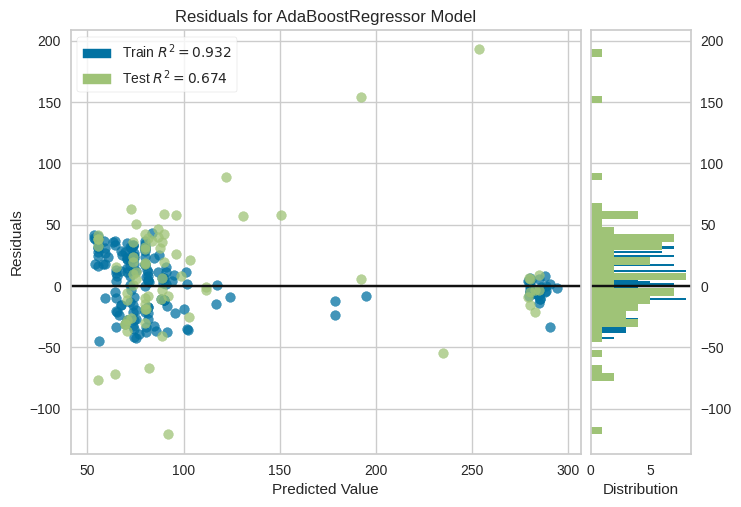

In [13]:
# plot residuals
exp.plot_model(best, plot = 'residuals')


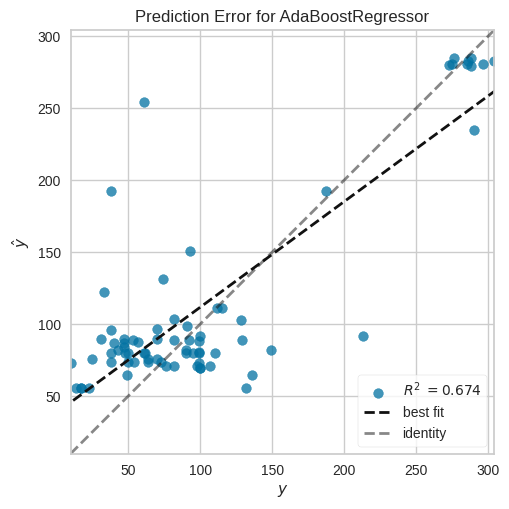

In [14]:
# plot error
exp.plot_model(best, plot = 'error')